<img align="right" width="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/601px-Cluster-2.svg.png">

# Clustering with Python

This notebook contains an overview of basic python functionalities for clustering using the [`sklearn`](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img align="right" width="150" src="https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg">

## Iris Dataset  

[Link](https://archive.ics.uci.edu/ml/datasets/iris) to the dataset on the UCI Machine Learning Repository.  
As first step we load the whole Titanic Dataset and make confidence with its features.  

In [2]:
df = pd.read_csv("data/iris.csv", skipinitialspace=True, sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
The predictive attribute is the class of the iris plant. 

Fetures:
* sepal length (in cm)
* sepal width (in cm)
* petal length (in cm) 
* petal width (in cm) 
* class: Iris-setosa, Iris-versicolour, Iris-virginica

Since clustering is an ***unsupervised*** task we save the class attribute in a varable and we remove it from the dataframe.

In [4]:
classes = df['class']
del df['class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Understanding

We observe the distributions of the attributes without considering the class.

In [5]:
from pandas.plotting import scatter_matrix

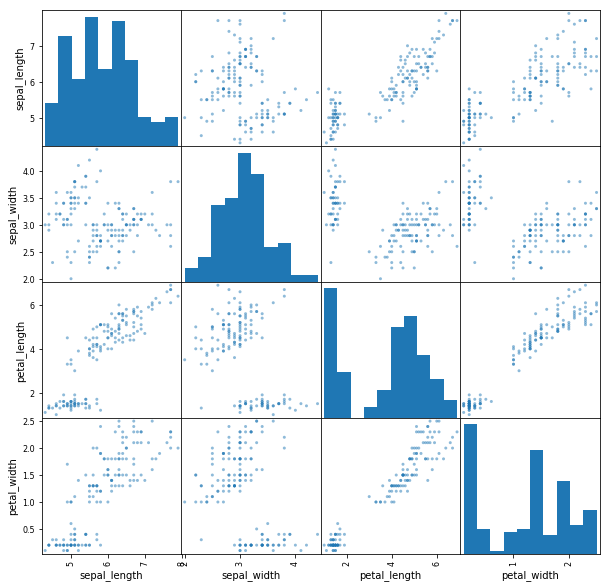

In [6]:
scatter_matrix(df, figsize=(10, 10))
plt.show()

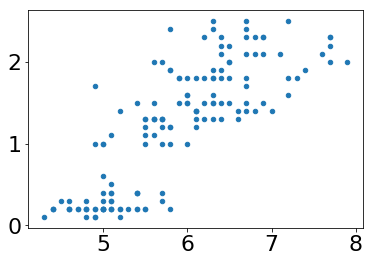

In [7]:
plt.scatter(df['sepal_length'], df['petal_width'], s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Clustering Objective
Grouping a set of instances such that the instances in the same cluster are more ***similar*** (in some sense) to each other than to those in other clusters.  
The result of a clustering algorithm is a ***clustering***, that is a set of clusters.
Clustering is an ***unsupervised*** task, i.e., the real cluster partitioning is unknown.  

## Different Types of Clusterings and Clusters

Principal Types of Clustering:
* **Partitional Clustering:** division into non-overlapping clusters, i.e., each instance is only in one cluster
* Hierarchical Clustering: set of nested clusters organized as a hierarchical tree

Principal Types of Clusters:
* **Center-based:** the calculus is based on a centroid (K-Means)
* **Density-based:** the calculus is based on a concept of neighborhood and density (DBSCAN)

Center-based: <img align="center" src="./img/center_based.png">
Density-based: <img align="center" src="./img/density_based.png">

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
df.head().values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
scaler.transform(df.head().values)

array([[ 1.29399328,  0.95025527,  0.        ,  0.        ],
       [ 0.21566555, -1.2094158 ,  0.        ,  0.        ],
       [-0.86266219, -0.34554737, -1.58113883,  0.        ],
       [-1.40182605, -0.77748158,  1.58113883,  0.        ],
       [ 0.75482941,  1.38218948,  0.        ,  0.        ]])

In [12]:
scaler.inverse_transform(scaler.transform(df.head().values))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [14]:
X[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

---

# K-Means

### Algorithm

**Objective:** Clusters the data into $k$ groups.

1. **Init:** Select k points at random as cluster centers (a.k.a. _centroids_ ).
2. **Assign:** Assign each instance to the cluster with the closest mean according to the distance function.
3. **Update**: Calculate the new means to be the centroids of the instances in the new clusters.
4. ***Repeat*** steps 2-3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

![kmeans](img/kmeans.gif)

Credits: [K-Means Clustering: From A to Z](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)

### Drawbacks

* Initialize centroids
* Decide the number of clusters

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

In [16]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

Labels

In [17]:
kmeans.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

Observing the size of each cluster

In [18]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 39, 1: 50, 2: 61}

Visualization of the clustering in two dimensions.

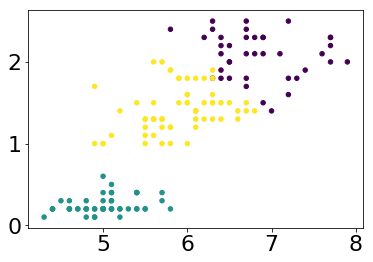

In [19]:
plt.scatter(df['sepal_length'], df['petal_width'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Centers

In [20]:
kmeans.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

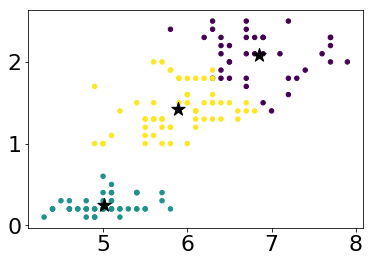

In [21]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(df['sepal_length'], df['petal_width'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

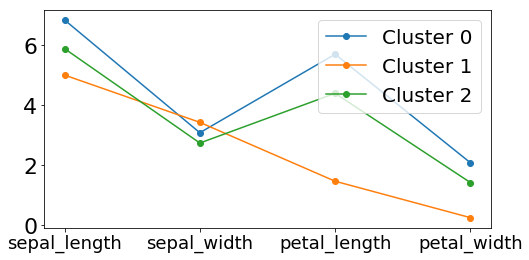

In [22]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

### Evaluating the cluster quality

A good clustering is when datapoints within a cluster are close together, and afar from other clusters.

The two methods to measure the cluster quality are:
1. **Intertia**: it tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of interia's value starts from zero and goes up.

2. **Silhouette score**: it tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. The closer to 1, the better.

In [23]:
print('Interia %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

Interia 6.982216473785234
Silhouette 0.5047687565398589


### How many clusters?

We can use the value of _intertia_ to determine the right number of clusters. The idea behind good clustering is having a small value of inertia, and a small number of clusters.

The value of interia decreases as the number of clusters increase. So it's a trade-off here.

### Knee Method

**Rule of thumb**: The elbow point in the interia graph is a good choice because after that change in the value of intertia isn't significant.

![](img/knee_method.png)

In [24]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [44]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

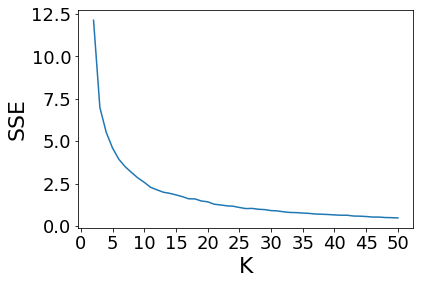

In [47]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(0, 51, 5))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

---

# DBSCAN

## Why?

Dealing with spatial clusters of different density, size and shape, can be challenging. The task can be even more complicated if the data contains noise and outliers.

## Idea

The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.
So, how dow we measure the density of a region?

- **Density at $P$**: number of points within a circle of radius $\epsilon$ from point P.
- **Dense region**: For each point in the cluster, the circle with radius $\epsilon$ contains at least $MinPts$. 

The **$\epsilon$-neighborhood** of a point $P$ in the database $D$ is defined as: $$N(p) = \left\{q \in D | dist(p,q) \leq \epsilon\right\}$$

<!-- ![dbscan](img/dbscan.png) -->
<img src='img/dbscan.png' width=80%>

Credits: [DBSCAN Algorithm: Complete Guide and Application with Python Scikit-Learn](https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d)

Following the definition of dense region, a point can be classified as:

* **Core Point**: if it has more than minPts points within eps.
* **Border Point**: if it has less than minPts points within eps but one of its neighboors is a core point.
* **Noise Point**: if it is neither a core or a border point.

## Algorithm

1. Choose an arbitrary point which has not been visited and its neighbourhood information is retrieved from the $\epsilon$ parameter.

2. If this point contains $MinPts$ within $\epsilon$ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the $\epsilon$ neighborhood of a different point and, thus, can be made part of the cluster. Concept of density reachable and density connected points are important here.

3. If a point is found to be a core point then the points within the $\epsilon$ neighborhood is also part of the cluster. So all the points found within a $\epsilon$ neighborhood are added, along with their own $\epsilon$ neighborhood, if they are also core points.

4. The process continues until the density connected cluster is completely found.

5. The process restarts with a new point which can be a part of a new cluster or labeled as noise.

## Drawbacks

* Parameter tuning ($\epsilon$, $MinPts$) can be tricky.
* Does not recognize different densities.

## DBSCAN in Python ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#dbscan))

In [26]:
from sklearn.cluster import DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [69]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

Labels

In [70]:
dbscan.labels_[:5]

array([0, 0, 0, 0, 0])

Observing the size of each cluster

In [71]:
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
dict(zip(bins, hist))

{-1: 70, 0: 42, 1: 9, 2: 7, 3: 17, 4: 5, 5: 0}

Visualization of the clustering in two dimensions.

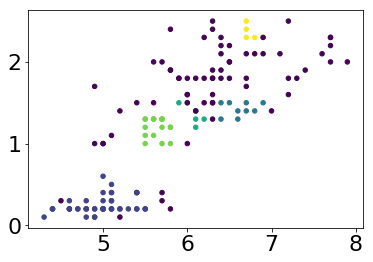

In [72]:
plt.scatter(df['sepal_length'], df['petal_width'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Clustering Validation

In [73]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.057412845170915446


### Knee Method to estimate the best eps

In [82]:
from scipy.spatial.distance import pdist, squareform

In [83]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

In [84]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [89]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


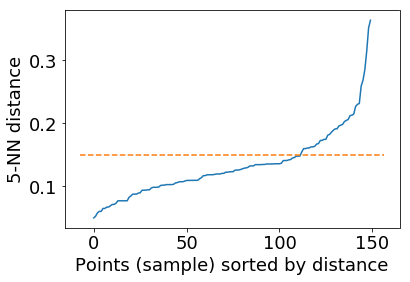

In [90]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('%s-NN distance' % k, fontsize=18)
plt.xlabel('Points (sample) sorted by distance', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

abline(0, 0.15)

plt.show()